In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from gower.gower_dist import *


# Adjusted Rand Index/Adjusted Mutual Information

  0%|          | 0/10 [00:00<?, ?it/s]

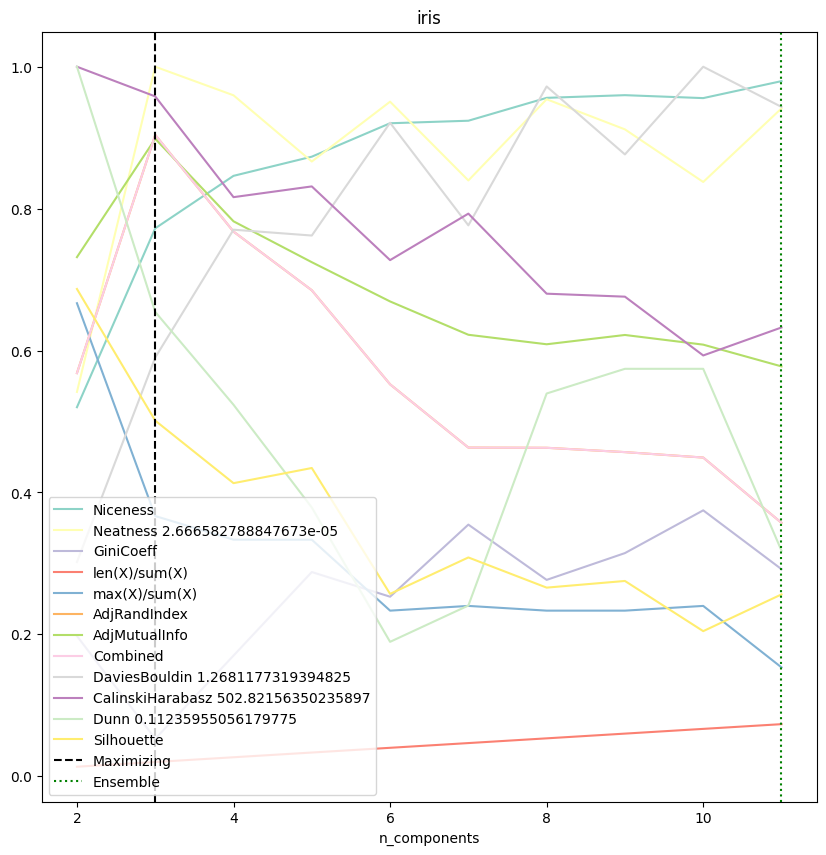

{'Silhouette': 0.5011761635067209, 'Niceness': 0.7722335369993211, 'Neatness': 2.666582788847673e-05, 'GiniCoeff': 0.052700922266139656, 'len(X)/sum(X)': 0.02, 'max(X)/sum(X)': 0.36666666666666664, 'sample': {'n_components': 3, 'random_state': 42}, 'counts_dict': {45: 1, 50: 1, 55: 1}, 'DaviesBouldin': 0.7483456326730998, 'CalinskiHarabasz': 481.78070899745234, 'Dunn': 0.07352941176470572, 'AdjRandIndex': 0.9038742317748124, 'AdjMutualInfo': 0.8984361033676299}


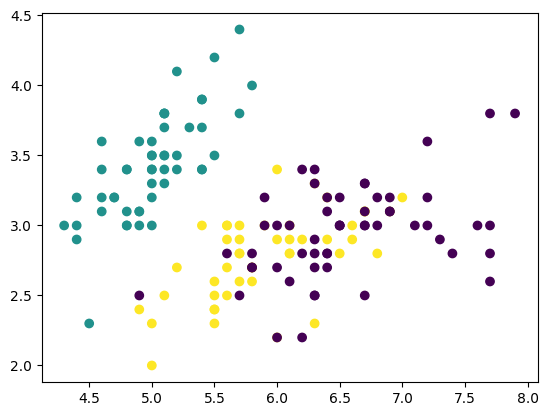

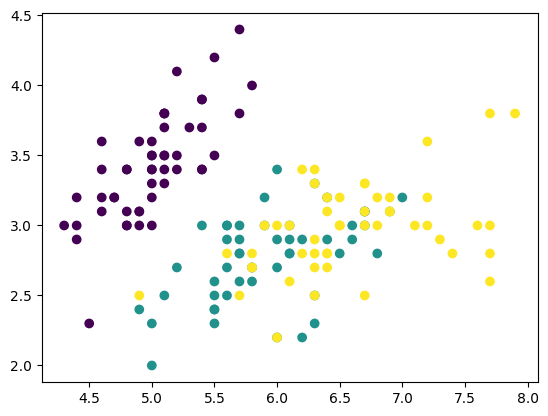

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.320833,-0.546814,-0.546814
K + L,-0.320833,-0.546814,-0.546814
Niceness,-0.320833,-0.546814,-0.546814
Neatness,0.000000,0.000000,0.000000
GiniCoeff,-0.290174,-0.454763,-0.454763
Silhouette,-0.166851,-0.335758,-0.335758
DaviesBouldin,-0.290174,-0.454763,-0.454763
CalinskiHarabasz,-0.166851,-0.335758,-0.335758
Dunn,-0.166851,-0.335758,-0.335758


In [2]:
iris = load_iris()
iris_y = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris, (_, res) = optimize_gm(iris, "iris", iris_y)

plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris.cluster.astype(int))
plt.show()
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris_y)
plt.show()

res


  0%|          | 0/34 [00:00<?, ?it/s]

[] [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.         1.73205081
 1.41421356 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 7.09106267] []


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

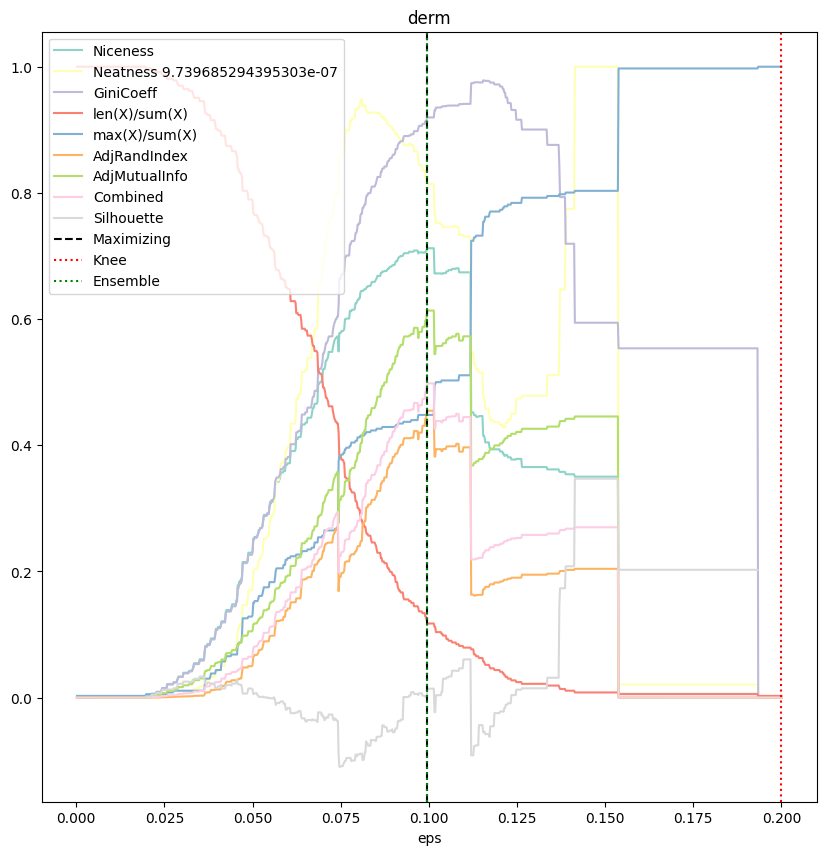

{'Silhouette': 0.01425000136019063, 'Niceness': 0.7122944992339502, 'Neatness': 7.929622096339349e-07, 'GiniCoeff': 0.9196583487850829, 'len(X)/sum(X)': 0.11748633879781421, 'max(X)/sum(X)': 0.44808743169398907, 'sample': {'eps': 0.09960000000000001, 'min_samples': 1}, 'counts_dict': {1: 36, 2: 1, 3: 1, 5: 1, 18: 1, 65: 1, 73: 1, 164: 1}, 'AdjRandIndex': 0.45476869904533196, 'AdjMutualInfo': 0.6135281941006772}


(     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
 0           2        2                 0        3                   0   
 1           3        3                 3        2                   1   
 2           2        1                 2        3                   1   
 3           2        2                 2        0                   0   
 4           2        3                 2        2                   2   
 ..        ...      ...               ...      ...                 ...   
 361         2        1                 1        0                   1   
 362         3        2                 1        0                   1   
 363         3        2                 2        2                   3   
 364         2        1                 3        1                   2   
 365         3        2                 2        0                   0   
 
      polygonal_papules  follicular_papules  oral_mucosal_involvement  \
 0                    0              

In [3]:
derm = pd.read_csv("dermatology_database_1.csv")
derm.loc[derm.age == "?", "age"] = derm.age[derm.age != "?"].median()
derm.age = derm.age.astype(int)

optimize_dbscan(derm.drop("class", axis=1), "derm", derm["class"],
                        factor=0.2, precomputed=True, chunksize=20)


  0%|          | 0/14 [00:00<?, ?it/s]

[1.] [6.39970864 7.28787297 6.79107961 5.468764   2.37841423 3.62279156
 7.09840555 7.85788398 4.12310563 3.26325245 4.96876639 2.15212666
 2.25143734 2.26535268] []


  0%|          | 0/515 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

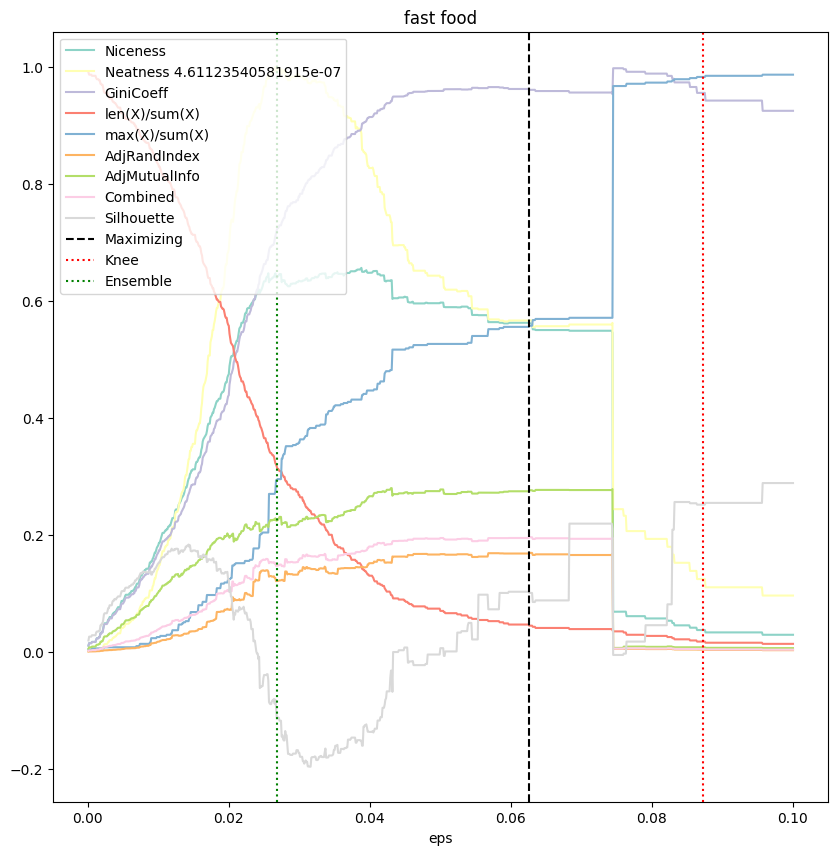

{'Silhouette': 0.10060969795580542, 'Niceness': 0.5613272996751916, 'Neatness': 2.6121289338944257e-07, 'GiniCoeff': 0.9604582409460458, 'len(X)/sum(X)': 0.04466019417475728, 'max(X)/sum(X)': 0.5572815533980583, 'sample': {'eps': 0.0626, 'min_samples': 1}, 'counts_dict': {1: 19, 3: 1, 5: 1, 201: 1, 287: 1}, 'AdjRandIndex': 0.16905091888101684, 'AdjMutualInfo': 0.27608212282119987}


(                                           calories  cal_fat  total_fat  \
 item                                                                      
 Artisan Grilled Chicken Sandwich                380       60          7   
 Single Bacon Smokehouse Burger                  840      410         45   
 Double Bacon Smokehouse Burger                 1130      600         67   
 Grilled Bacon Smokehouse Chicken Sandwich       750      280         31   
 Crispy Bacon Smokehouse Chicken Sandwich        920      410         45   
 ...                                             ...      ...        ...   
 Spicy Triple Double Crunchwrap                  780      340         38   
 Express Taco Salad w/ Chips                     580      260         29   
 Fiesta Taco Salad-Beef                          780      380         42   
 Fiesta Taco Salad-Chicken                       720      320         35   
 Fiesta Taco Salad-Steak                         720      320         36   
 
          

In [4]:
fastfood = pd.read_csv("fastfood.csv", index_col=1)

optimize_dbscan(fastfood.drop("restaurant", axis=1), "fast food", fastfood.restaurant,
                            factor=0.1, precomputed=True, chunksize=20)


  0%|          | 0/2048 [00:00<?, ?it/s]

[] [1. 1. 1. ... 1. 1. 1.] []


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

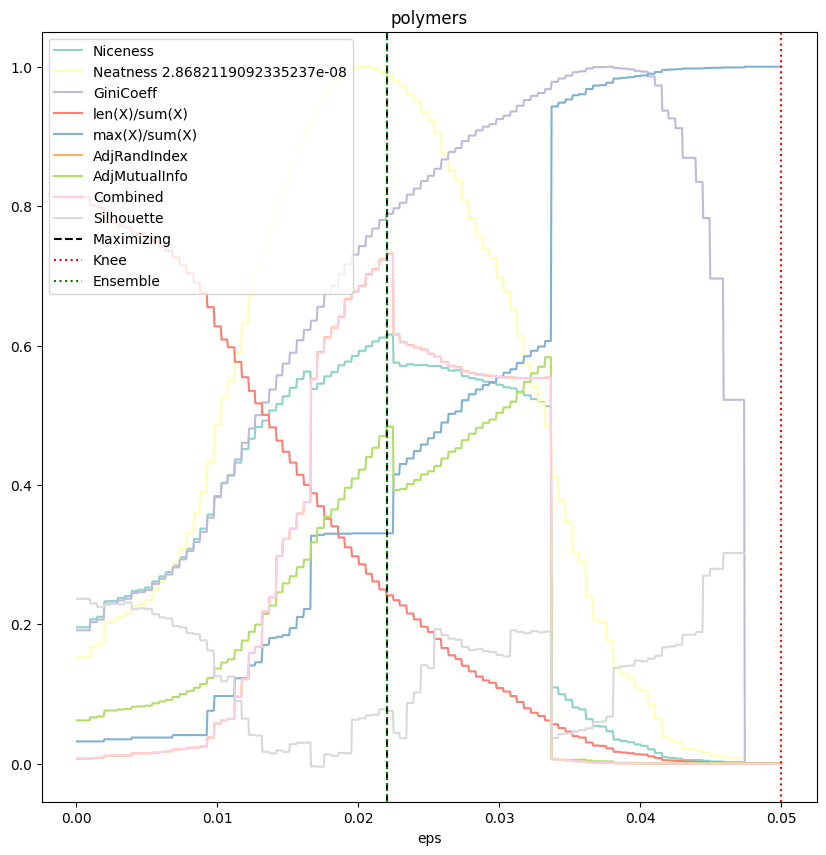

{'Silhouette': 0.07561327254696937, 'Niceness': 0.6157846661227364, 'Neatness': 2.8320690136160553e-08, 'GiniCoeff': 0.7889404601847613, 'len(X)/sum(X)': 0.2415, 'max(X)/sum(X)': 0.3305, 'sample': {'eps': 0.022, 'min_samples': 1}, 'counts_dict': {1: 456, 2: 18, 3: 4, 4: 1, 13: 1, 160: 1, 658: 1, 661: 1}, 'AdjRandIndex': 0.7318157043182635, 'AdjMutualInfo': 0.4835660408958565}


(       0  1  2  3  4  5  6  7  8  9  ...  2039  2040  2041  2042  2043  2044  \
 763    0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 16021  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 19925  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 3494   0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 15094  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 ...   .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
 15003  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 18494  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 10182  0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 19910  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 8555   0  1  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
 
        2045  2046  2047  

In [5]:
polymers = pd.read_csv('polymers_dataset.csv', index_col=0).drop("smiles", axis=1).sample(n=2000, random_state=0)

optimize_dbscan(polymers.drop("label", axis=1), "polymers", polymers.label, factor=0.05, precomputed=True, chunksize=20)


  0%|          | 0/50 [00:00<?, ?it/s]

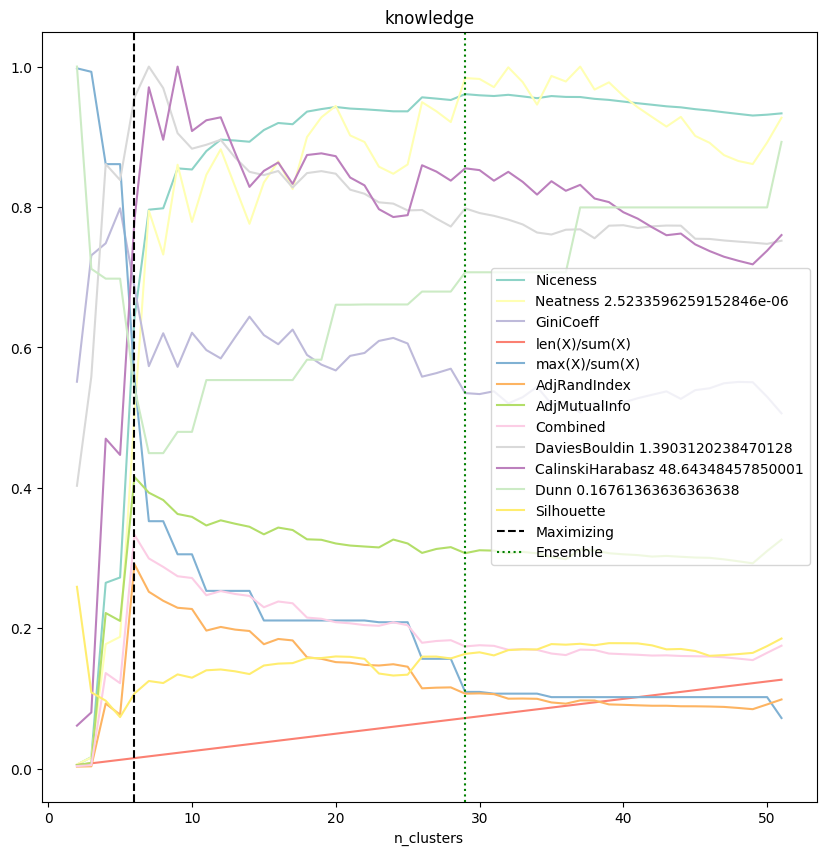

{'Silhouette': 0.10689174993730502, 'Niceness': 0.6417003057189, 'Neatness': 1.2710128407971116e-06, 'GiniCoeff': 0.6857221382437818, 'len(X)/sum(X)': 0.01488833746898263, 'max(X)/sum(X)': 0.5558312655086849, 'sample': {'n_clusters': 6, 'linkage': 'average'}, 'counts_dict': {1: 1, 2: 1, 17: 1, 36: 1, 123: 1, 224: 1}, 'DaviesBouldin': 1.329076702126, 'CalinskiHarabasz': 38.01357842855398, 'Dunn': 0.09090909090909088, 'AdjRandIndex': 0.2911903949737534, 'AdjMutualInfo': 0.4154571809043566}


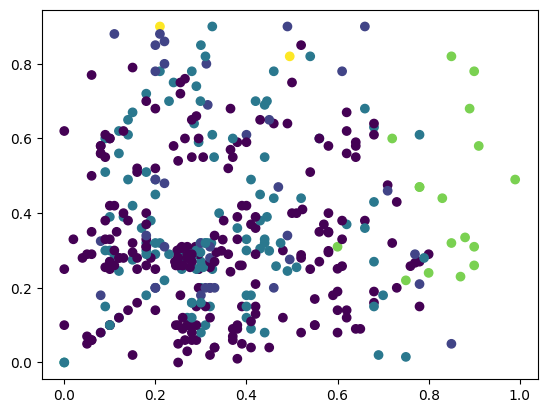

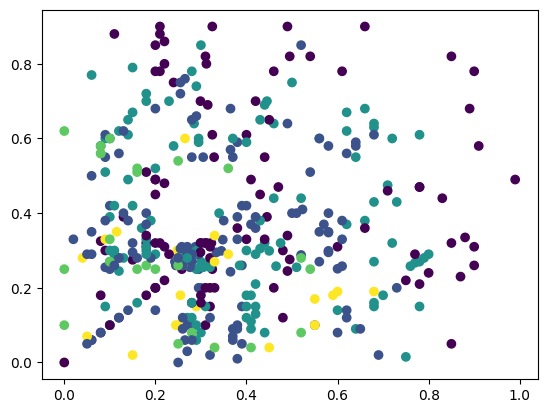

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.114130,-0.197028,-0.169141
K + L,-0.108620,-0.184517,-0.158985
Niceness,-0.108620,-0.184517,-0.158985
Neatness,-0.103292,-0.194140,-0.163579
GiniCoeff,-0.205152,-0.214545,-0.211385
Silhouette,-0.410538,-0.288392,-0.329482
DaviesBouldin,-0.022457,-0.039348,-0.033666
CalinskiHarabasz,-0.052848,-0.062158,-0.059026
Dunn,-0.410538,-0.288392,-0.329482


In [6]:
knowledge = pd.read_excel("Predict_student_ knowledge_level.xls")

know, (_, res) = optimize_agglo(knowledge.iloc[:, :-1], "knowledge", knowledge.iloc[:, -1], n_iter=50)

plt.scatter(knowledge.iloc[:, 0], knowledge.iloc[:, 1], c=know.cluster.astype(int))
plt.show()
plt.scatter(knowledge.iloc[:, 0], knowledge.iloc[:, 1], c=LabelEncoder().fit_transform(knowledge.iloc[:, -1]))
plt.show()

res

In [7]:
seed = pd.read_csv("Seed_Data.csv")

  0%|          | 0/7 [00:00<?, ?it/s]

[] [11.17095021 11.02655914 10.30352261 10.52668977 10.83749064  9.59754658
  8.6403386 ] []


  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

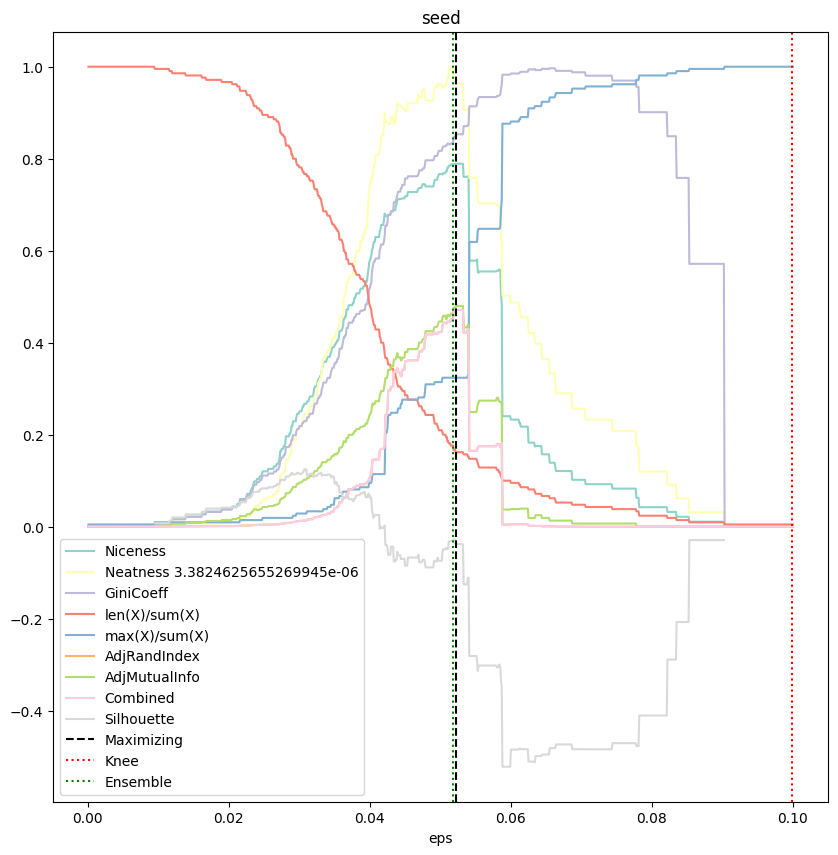

{'Silhouette': -0.038158165529647646, 'Niceness': 0.7890638160025916, 'Neatness': 3.259107950265882e-06, 'GiniCoeff': 0.8529411764705882, 'len(X)/sum(X)': 0.1619047619047619, 'max(X)/sum(X)': 0.3238095238095238, 'sample': {'eps': 0.0522, 'min_samples': 1}, 'counts_dict': {1: 22, 2: 4, 4: 3, 5: 1, 17: 1, 34: 1, 44: 1, 68: 1}, 'AdjRandIndex': 0.47111542464404066, 'AdjMutualInfo': 0.48001839513323724}


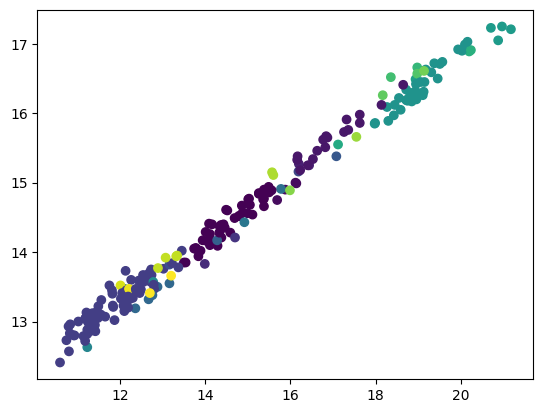

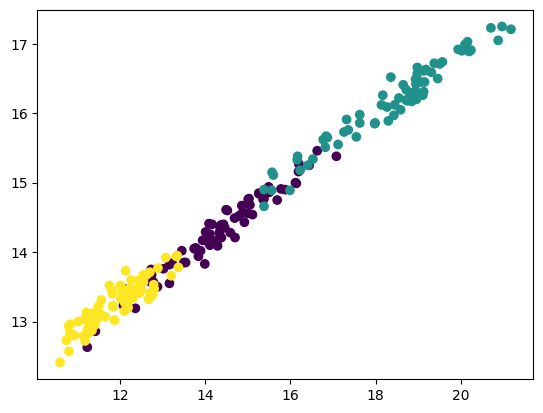

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.093984,-0.109419,-0.109419
K + L,-0.046795,-0.049266,-0.049266
Niceness,0.000000,0.000000,0.000000
Neatness,-0.016442,-0.020141,-0.020141
GiniCoeff,-0.466967,-0.470635,-0.470635
Silhouette,-0.377606,-0.457846,-0.457846
Knee,-0.480018,-0.471115,-0.471115
Ensemble,-0.016442,-0.020141,-0.020141


In [8]:
seed_, (_, res) = optimize_dbscan(seed.iloc[:, :-1], "seed", seed.iloc[:, -1], factor=0.1, precomputed=True, chunksize=20)

plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed_.cluster.astype(int))
plt.show()
plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed.iloc[:, -1].astype(int).values)
plt.show()

res

  0%|          | 0/50 [00:00<?, ?it/s]

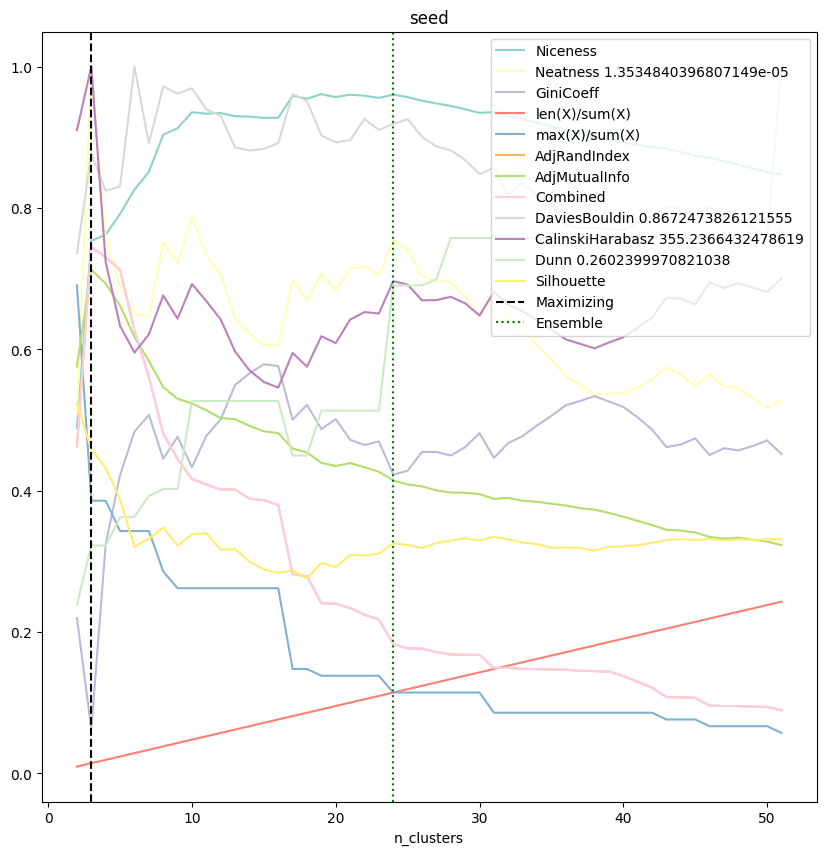

{'Silhouette': 0.45811237500951896, 'Niceness': 0.7535478806907379, 'Neatness': 1.3534840396807149e-05, 'GiniCoeff': 0.06227106227106227, 'len(X)/sum(X)': 0.014285714285714285, 'max(X)/sum(X)': 0.38571428571428573, 'sample': {'n_clusters': 3, 'linkage': 'average'}, 'counts_dict': {64: 1, 65: 1, 81: 1}, 'DaviesBouldin': 0.7604252429877031, 'CalinskiHarabasz': 355.2366432478619, 'Dunn': 0.08387643323855298, 'AdjRandIndex': 0.7441752360248661, 'AdjMutualInfo': 0.7125656350131796}


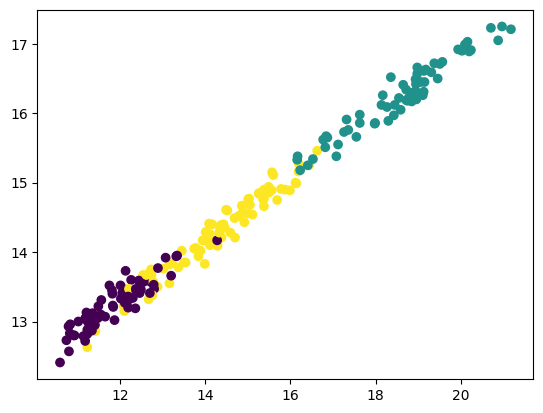

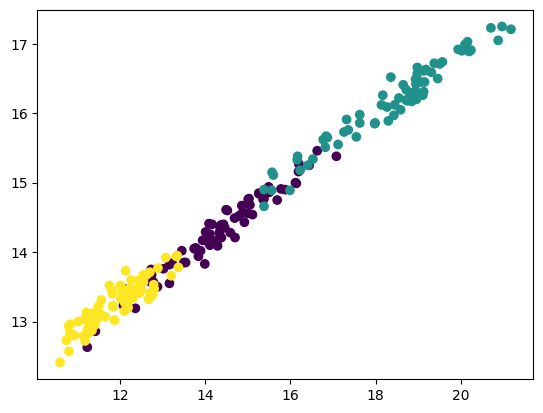

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.298140,-0.561379,-0.561379
K + L,-0.298140,-0.561379,-0.561379
Niceness,-0.273293,-0.503498,-0.503498
Neatness,0.000000,0.000000,0.000000
GiniCoeff,-0.228742,-0.357838,-0.357838
Silhouette,-0.137007,-0.281737,-0.281737
DaviesBouldin,-0.095233,-0.117895,-0.117895
CalinskiHarabasz,0.000000,0.000000,0.000000
Dunn,-0.389746,-0.655015,-0.655015


In [9]:
seed_, (_, res) = optimize_agglo(seed.iloc[:, :-1], "seed", seed.iloc[:, -1], n_iter=50)

plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed_.cluster.astype(int))
plt.show()
plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed.iloc[:, -1].astype(int).values)
plt.show()

res

  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [ 5.21938615 18.14443359 17.02443218  4.12310563] []


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

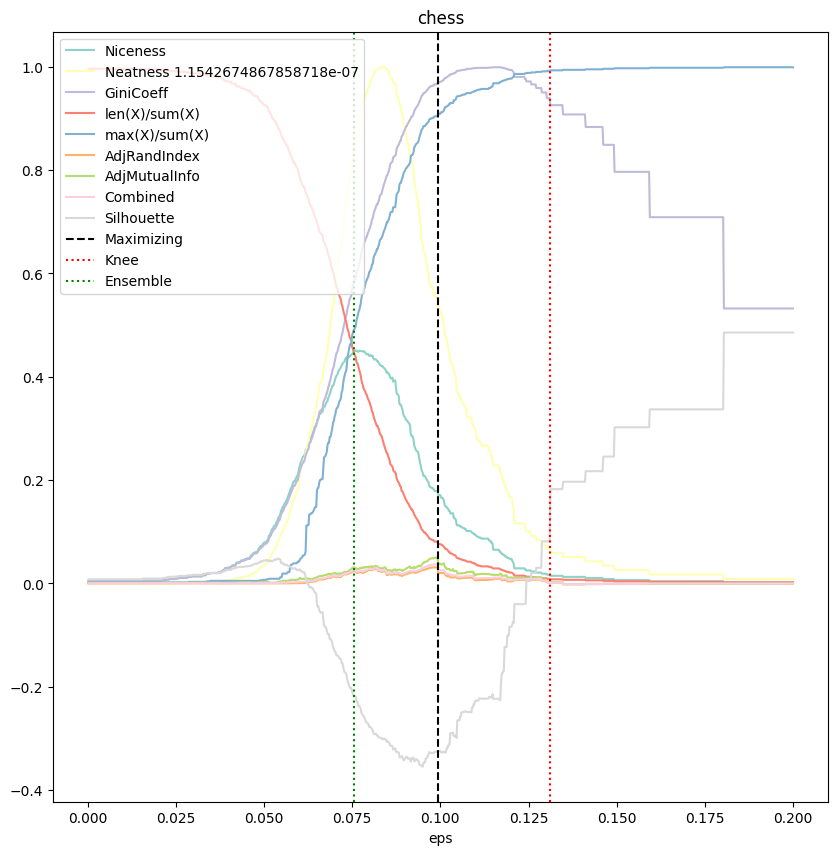

{'Silhouette': -0.325300712616967, 'Niceness': 0.17760309626103235, 'Neatness': 6.309348542179924e-08, 'GiniCoeff': 0.967492213046985, 'len(X)/sum(X)': 0.079, 'max(X)/sum(X)': 0.905, 'sample': {'eps': 0.0992, 'min_samples': 1}, 'counts_dict': {1: 67, 2: 6, 3: 4, 4: 1, 905: 1}, 'AdjRandIndex': 0.031247818250447146, 'AdjMutualInfo': 0.05117785582095812}


,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.022987,-0.010099,-0.014185
K + L,-0.042027,-0.029941,-0.033773
Niceness,-0.021176,-0.007461,-0.011810
Neatness,-0.022444,-0.008969,-0.013241
GiniCoeff,-0.032780,-0.022017,-0.025429
Silhouette,-0.051555,-0.031576,-0.037911
Knee,-0.048420,-0.029575,-0.035551
Ensemble,-0.020163,-0.006751,-0.011004


In [10]:
chess = pd.read_csv("chess_games.csv", index_col=0).drop(
    ["white_id", "black_id", "moves",
     "opening_shortname", "opening_response", "opening_variation"], axis=1).sample(n=1000, random_state=0)
chess_, (_, res) = optimize_dbscan(chess.drop("winner", axis=1), "chess", chess.winner, factor=0.2, precomputed=True, chunksize=20)
res

  0%|          | 0/3 [00:00<?, ?it/s]

[] [ 7.3851009  21.69746039 14.66356059] []


  0%|          | 0/2013 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

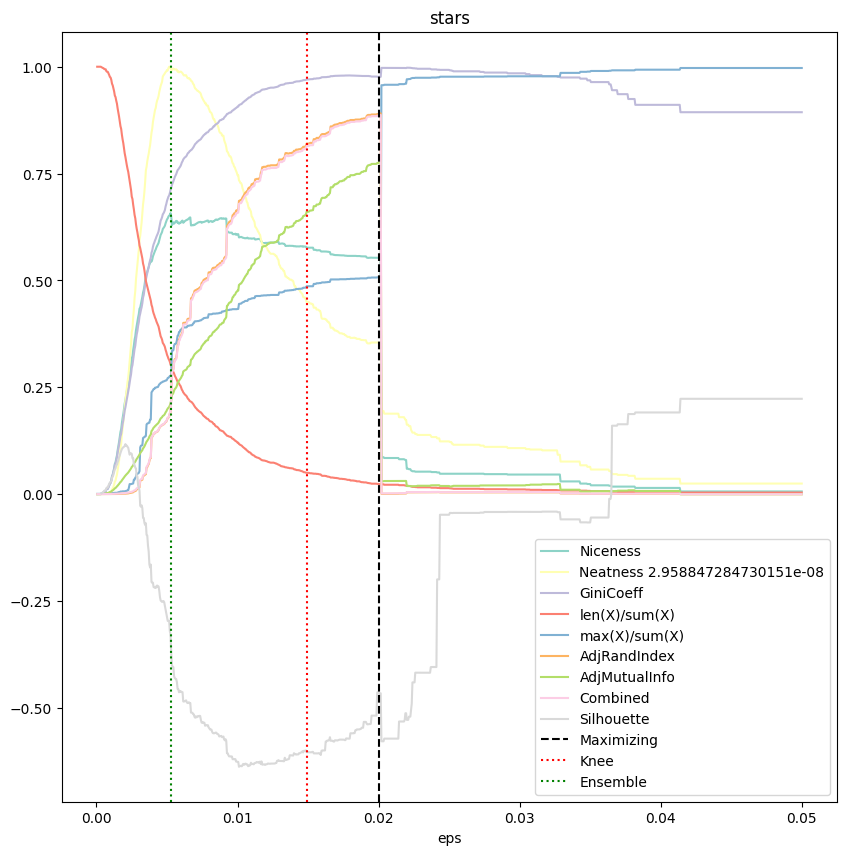

{'Silhouette': -0.4660618940409146, 'Niceness': 0.552197488287925, 'Neatness': 1.0455875848690792e-08, 'GiniCoeff': 0.9763763740151908, 'len(X)/sum(X)': 0.02334823646299056, 'max(X)/sum(X)': 0.5072031793343269, 'sample': {'eps': 0.020050000000000002, 'min_samples': 1}, 'counts_dict': {1: 34, 2: 6, 3: 1, 4: 1, 6: 1, 7: 1, 21: 1, 905: 1, 1021: 1}, 'AdjRandIndex': 0.8909669840902742, 'AdjMutualInfo': 0.777990722269651}


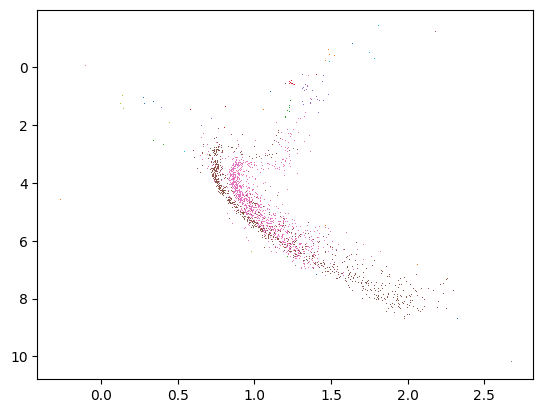

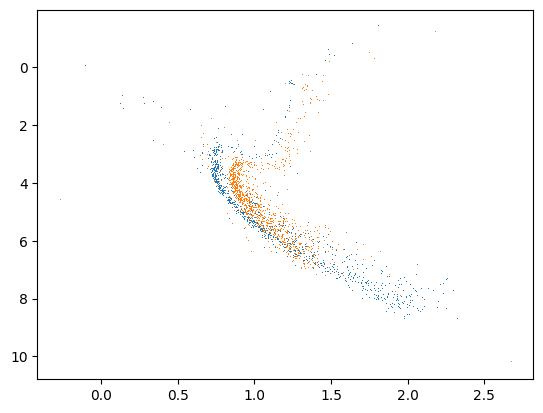

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.556930,-0.665453,-0.661703
K + L,0.000000,0.000000,0.000000
Niceness,-0.566035,-0.699495,-0.694883
Neatness,-0.574445,-0.710270,-0.705576
GiniCoeff,-0.759142,-0.886835,-0.882422
Silhouette,-0.778140,-0.891179,-0.887273
Knee,-0.117372,-0.070813,-0.072422
Ensemble,-0.566035,-0.699495,-0.694883


In [11]:
m67 = pd.read_csv("archive-8/m67_filtered.csv")
m67["cluster"] = "m67"
ngc188 = pd.read_csv("archive-8/NGC188_filtered.csv")
ngc188["cluster"] = "ngc188"
stars = pd.concat([m67, ngc188], axis=0)

prlx = stars.iloc[:, 0]  #Parallax
gmag = stars.iloc[:, 1]  #G-band magnitude
bpmrp = stars.iloc[:, 2] #BP minus RP color
d = 1.0/prlx       #kiloparsecs
y = gmag - 5.0*np.log10(d/0.01)

stars_, (_, res) = optimize_dbscan(stars.drop("cluster", axis=1), "stars", stars.cluster,
                                   factor=0.05, precomputed=True, chunksize=20)

clusters, counts = np.unique(stars_.cluster, return_counts=True)
for cluster in clusters[np.argsort(counts)]:
    plt.plot(bpmrp[stars_.cluster == cluster], y[stars_.cluster == cluster], ",")
plt.gca().invert_yaxis()
plt.show()

plt.plot(bpmrp[stars.cluster.str.endswith("m67")], y[stars.cluster.str.endswith("m67")], ",")
plt.plot(bpmrp[stars.cluster.str.endswith("ngc188")], y[stars.cluster.str.endswith("ngc188")], ",")
plt.gca().invert_yaxis()
plt.show()

res


Let's redo that one, using feature importance to weight the distance matrix.

As one might expect, weighting by feature importance improves the result.

[] [0.72033658 0.13331719 0.14634623] []


  0%|          | 0/2013 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

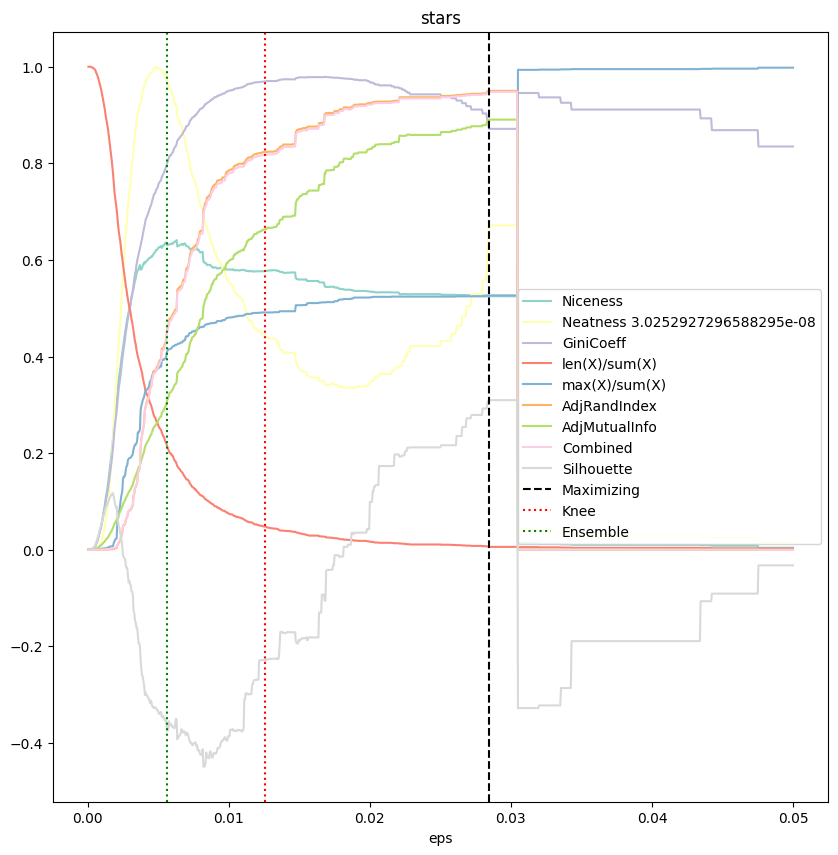

{'Silhouette': 0.3097620923696001, 'Niceness': 0.5247792640672941, 'Neatness': 2.031953267952815e-08, 'GiniCoeff': 0.8713709118625277, 'len(X)/sum(X)': 0.005961251862891207, 'max(X)/sum(X)': 0.5265772478887233, 'sample': {'eps': 0.028450000000000003, 'min_samples': 1}, 'counts_dict': {1: 9, 4: 1, 940: 1, 1060: 1}, 'AdjRandIndex': 0.9500206130090363, 'AdjMutualInfo': 0.8904905458273582}


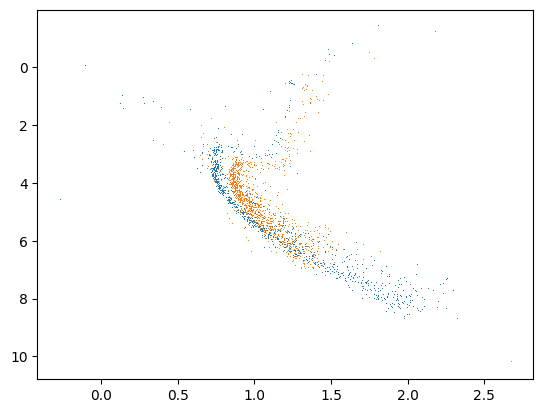

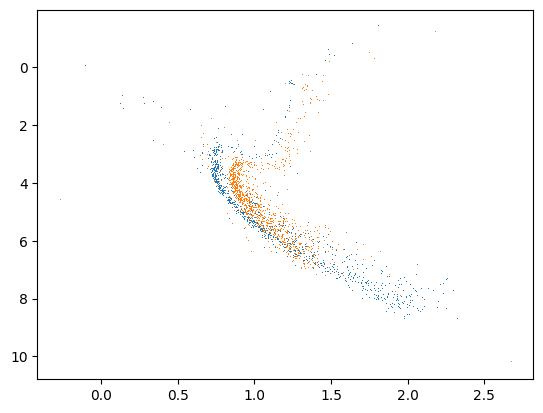

,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",-0.674549,-0.653469,-0.654198
K + L,-0.198726,-0.110249,-0.113307
Niceness,-0.543055,-0.450611,-0.453806
Neatness,-0.626516,-0.570529,-0.572464
GiniCoeff,-0.111118,-0.048613,-0.050773
Silhouette,0.000000,0.000000,0.000000
Knee,-0.226662,-0.126815,-0.130265
Ensemble,-0.584391,-0.501265,-0.504138


In [12]:
clf = RandomForestClassifier(random_state=0)
clf.fit(stars.iloc[:, :-1], stars.cluster)

stars_, (_, res) = optimize_dbscan(stars.drop("cluster", axis=1), "stars", stars.cluster,
                                   factor=0.05, precomputed=True,
                                   weight_num=clf.feature_importances_, chunksize=20)

clusters, counts = np.unique(stars_.cluster, return_counts=True)
for cluster in clusters[np.argsort(counts)]:
    plt.plot(bpmrp[stars_.cluster == cluster], y[stars_.cluster == cluster], ",")
plt.gca().invert_yaxis()
plt.show()

plt.plot(bpmrp[stars.cluster.str.endswith("m67")], y[stars.cluster.str.endswith("m67")], ",")
plt.plot(bpmrp[stars.cluster.str.endswith("ngc188")], y[stars.cluster.str.endswith("ngc188")], ",")
plt.gca().invert_yaxis()
plt.show()

res

0it [00:00, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [] []


  0%|          | 0/8124 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

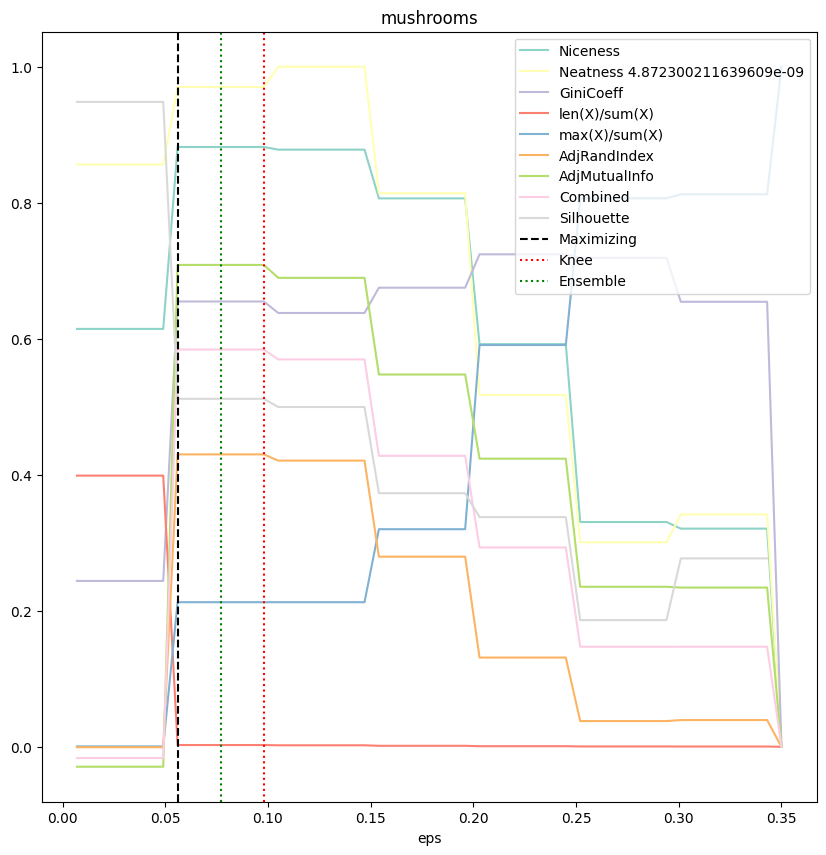

{'Silhouette': 0.511726015991195, 'Niceness': 0.881982743514466, 'Neatness': 4.726893820324076e-09, 'GiniCoeff': 0.6548191636006625, 'len(X)/sum(X)': 0.0027080256031511572, 'max(X)/sum(X)': 0.21270310192023634, 'sample': {'eps': 0.055999999999999994, 'min_samples': 1}, 'counts_dict': {8: 2, 16: 1, 32: 1, 36: 1, 48: 2, 96: 2, 104: 1, 192: 4, 256: 1, 288: 2, 512: 1, 768: 1, 1296: 1, 1728: 2}, 'AdjRandIndex': 0.4300211000078082, 'AdjMutualInfo': 0.7085868371096172}


,MutualInfo loss,RandIndex loss,Combined loss
Metric,,,
"Max(K, L)",0.000000,0.000000,0.000000
K + L,-0.018980,-0.009151,-0.014593
Niceness,0.000000,0.000000,0.000000
Neatness,-0.018980,-0.009151,-0.014593
GiniCoeff,-0.284859,-0.298701,-0.291038
Silhouette,-0.737760,-0.430538,-0.600629
Knee,0.000000,0.000000,0.000000
Ensemble,0.000000,0.000000,0.000000


In [13]:
mushrooms = pd.read_csv('mushroom.csv')

mush, (_, res) = optimize_dbscan(mushrooms.iloc[:, :-3],
                                 "mushrooms",
                                 mushrooms.iloc[:, -3] + mushrooms.iloc[:, -2] + mushrooms.iloc[:, -1],
                                 factor=0.35,
                                 n_iter=50,
                                 precomputed=True,
                                 # weight_cat=[cluster_niceness(np.unique(mushrooms.iloc[:, i], return_counts=True)[1])
                                 #             for i in range(mushrooms.shape[1] - 3)],
                                 chunksize=20)

res

# Correlation Ratio

  0%|          | 0/12 [00:00<?, ?it/s]

[1. 1.] [3.11408153 2.23606798 1.94661024 4.68286606 2.9017289  3.97290493
 4.         5.16292731 1.32467556 1.41421356 2.19227642 3.20879561] []


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

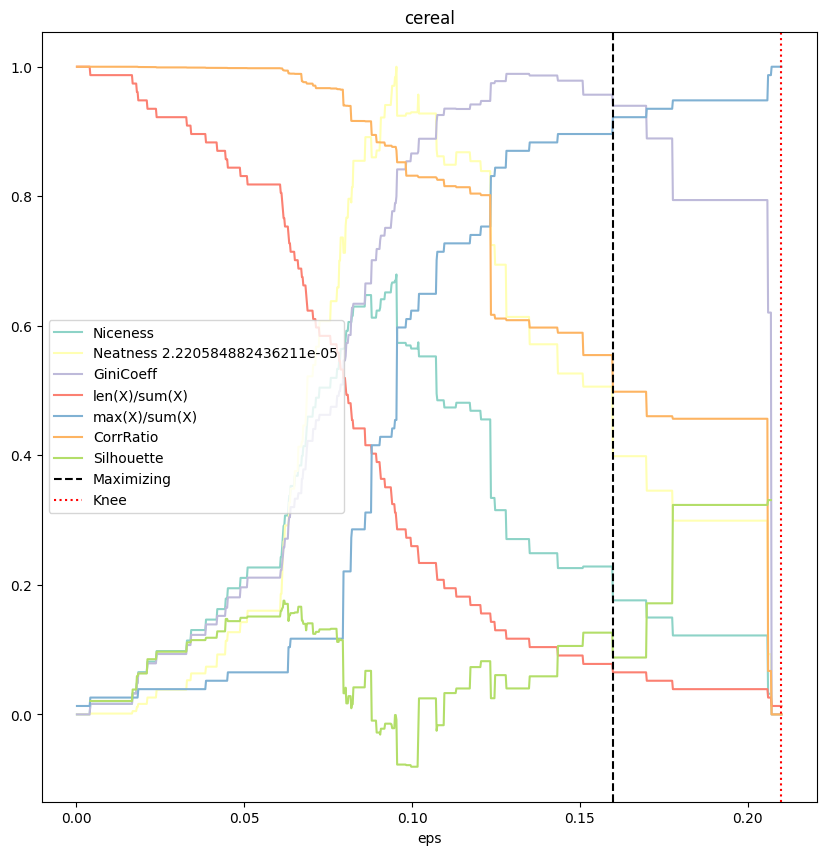

{'Silhouette': 0.08782114571955875, 'Niceness': 0.17606860511858502, 'Neatness': 8.8526652338858e-06, 'GiniCoeff': 0.9397058823529412, 'len(X)/sum(X)': 0.06493506493506493, 'max(X)/sum(X)': 0.922077922077922, 'sample': {'eps': 0.15981, 'min_samples': 1}, 'counts_dict': {1: 3, 3: 1, 71: 1}, 'CorrRatio': 0.49821386533824036}


(                          mfr type  calories  protein  fat  sodium  fiber  \
 name                                                                        
 100% Bran                   N    C        70        4    1     130   10.0   
 100% Natural Bran           Q    C       120        3    5      15    2.0   
 All-Bran                    K    C        70        4    1     260    9.0   
 All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
 Almond Delight              R    C       110        2    2     200    1.0   
 ...                        ..  ...       ...      ...  ...     ...    ...   
 Triples                     G    C       110        2    1     250    0.0   
 Trix                        G    C       110        1    1     140    0.0   
 Wheat Chex                  R    C       100        3    1     230    3.0   
 Wheaties                    G    C       100        3    1     200    3.0   
 Wheaties Honey Gold         G    C       110        2    1     

In [14]:
cereal = pd.read_csv("cereal.csv", index_col="name")

optimize_dbscan(cereal.drop("rating", axis=1), "cereal", cereal.rating,
                          factor=0.21, precomputed=True, chunksize=20)

  0%|          | 0/5 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [9.52153311 2.23606798 1.73205081 1.73205081 1.73205081] []


  0%|          | 0/546 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

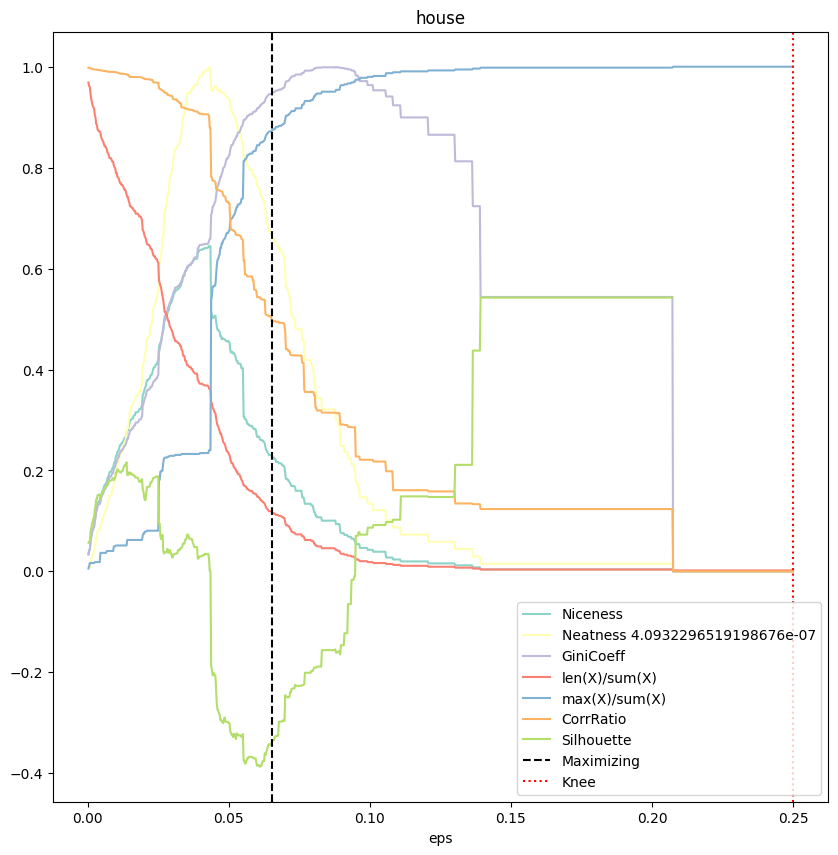

{'Silhouette': -0.33829438847778465, 'Niceness': 0.2278692540137709, 'Neatness': 2.7321991302799387e-07, 'GiniCoeff': 0.9474431818181818, 'len(X)/sum(X)': 0.11721611721611722, 'max(X)/sum(X)': 0.8736263736263736, 'sample': {'eps': 0.06525, 'min_samples': 1}, 'counts_dict': {1: 58, 2: 4, 3: 1, 477: 1}, 'CorrRatio': 0.4957925032394556}


(     lotsize  bedrooms  bathrooms  stories driveway recreation fullbase  \
 ID                                                                        
 1       5850         3          1        2      yes         no      yes   
 2       4000         2          1        1      yes         no       no   
 3       3060         3          1        1      yes         no       no   
 4       6650         3          1        2      yes        yes       no   
 5       6360         2          1        1      yes         no       no   
 ..       ...       ...        ...      ...      ...        ...      ...   
 542     4800         3          2        4      yes        yes       no   
 543     6000         3          2        4      yes         no       no   
 544     6000         3          2        4      yes        yes       no   
 545     6000         3          2        2      yes        yes       no   
 546     6000         3          1        2      yes         no       no   
 
     gashe

In [15]:
house = pd.read_csv("HousePrices_Canada.csv", index_col=0)

optimize_dbscan(house.drop("price", axis=1), "house", house.price, precomputed=True,
                         factor=0.25, chunksize=20)


(977, 12)
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              7
Operating System Version      5
Weight                      166
Price                       639
dtype: int64


  0%|          | 0/3 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [3.58239555 2.57960695 9.76533587] []


  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

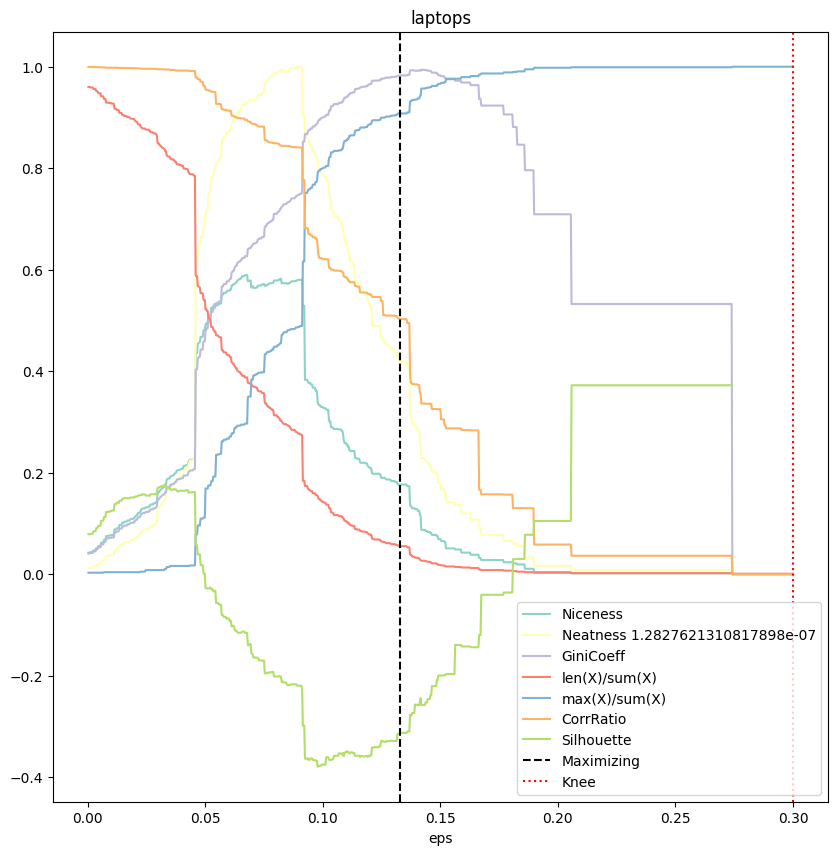

{'Silhouette': -0.31249829219418374, 'Niceness': 0.17687068393473845, 'Neatness': 5.377543145276203e-08, 'GiniCoeff': 0.9828237151880562, 'len(X)/sum(X)': 0.05527123848515865, 'max(X)/sum(X)': 0.9078812691914022, 'sample': {'eps': 0.13290000000000002, 'min_samples': 1}, 'counts_dict': {1: 39, 2: 7, 3: 2, 4: 1, 5: 2, 6: 1, 11: 1, 887: 1}, 'CorrRatio': 0.5026689251683989}


(               Category  Screen Size                              Screen  \
 Manufacturer                                                               
 Apple         Ultrabook         13.3  IPS Panel Retina Display 2560x1600   
 Apple         Ultrabook         13.3                            1440x900   
 HP             Notebook         15.6                   Full HD 1920x1080   
 Apple         Ultrabook         15.4  IPS Panel Retina Display 2880x1800   
 Apple         Ultrabook         13.3  IPS Panel Retina Display 2560x1600   
 ...                 ...          ...                                 ...   
 Dell             Gaming         17.3                   Full HD 1920x1080   
 Toshiba        Notebook         14.0                   Full HD 1920x1080   
 Asus             Gaming         17.3                   Full HD 1920x1080   
 HP             Notebook         15.6         IPS Panel Full HD 1920x1080   
 Lenovo         Notebook         14.0                            1366x768   

In [16]:
laptops = pd.read_csv("laptops/laptops_train.csv", index_col=0)
print(laptops.shape)
print(laptops.apply(lambda col: col.unique(), axis=0).apply(len))
laptops.drop(["Operating System Version", "Model Name"], axis=1, inplace=True)
laptops.RAM = np.log2(laptops.RAM.str[:-2].astype(float))  # all in GB
laptops.Weight = laptops.Weight.str[:-2].astype(float)  # all in kg
laptops["Screen Size"] = laptops["Screen Size"].str[:-1].astype(float)  # all in inches
optimize_dbscan(laptops.drop("Price", axis=1), "laptops",
                           laptops.Price, factor=0.3, precomputed=True, chunksize=20)


  0%|          | 0/7 [00:00<?, ?it/s]

[1.] [ 6.96600702 15.81850063 19.80317048  8.75886851  7.04872174  8.23989285
  3.        ] []


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

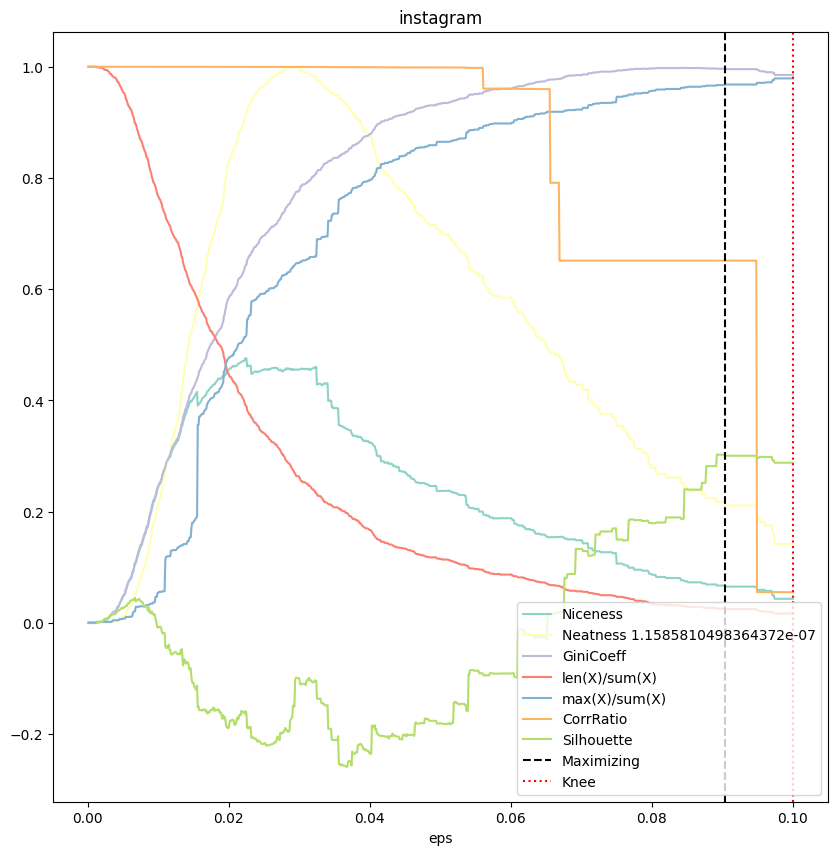

{'Silhouette': 0.3006493891934342, 'Niceness': 0.06542599839424013, 'Neatness': 2.4460227780164515e-08, 'GiniCoeff': 0.9956598240469208, 'len(X)/sum(X)': 0.025, 'max(X)/sum(X)': 0.968, 'sample': {'eps': 0.09040000000000001, 'min_samples': 1}, 'counts_dict': {1: 17, 2: 6, 3: 1, 968: 1}, 'CorrRatio': 0.6513490660619242}


(           Number of Posts  Number of Followers  Number of Followings  \
 Users                                                                   
 User-1                 486                  279                    19   
 User-2                 401                 5509                   342   
 User-3                 463                  453                   293   
 User-4                 154                 1231                  1477   
 User-5                 786                 9620                   421   
 ...                    ...                  ...                   ...   
 User-996              2599                 2684                  7300   
 User-997              2284                 4020                  2978   
 User-998               164                 2326                  6920   
 User-999                89                  286                   715   
 User-1000               83                 1587                  4997   
 
            Number of Likes for the 

In [17]:
instagram = pd.read_excel("MainDataset- Instagram.xlsx", index_col=0)
instagram["ratio"] = instagram["Number of Followers"] / instagram["Number of Followings"]

optimize_dbscan(instagram.drop("ratio", axis=1), "instagram", instagram["ratio"],
                            factor=0.1, precomputed=True, chunksize=20)
